In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Imports de todos os excel

In [2]:
patentes = pd.read_excel('../patentes/patentes.xlsx',sheet_name = 'Sheet1') 

In [3]:
marcas = pd.read_excel('../patentes/marca.xlsx',sheet_name = 'Sheet1')

In [4]:
software = pd.read_excel('../patentes/software.xlsx',sheet_name = 'Sheet1') 

In [5]:
desenho = pd.read_excel('../patentes/desenho.xlsx',sheet_name = 'Sheet1') 

In [54]:
topografia = pd.read_excel('../patentes/topografia.xlsx',sheet_name = 'Sheet1')

In [55]:
cultivar_registrada = pd.read_excel('../patentes/cultivar_registrada.xlsx',sheet_name = 'Sheet1') 

In [65]:
cultivar_protegida = pd.read_excel('../patentes/cultivar_protegida.xlsx',sheet_name = 'Sheet1') 

In [12]:
patentes.head()

,id_lattes,respondeu,inct,grupo_tematico,membro_status,nome_completo,id_patente,titulo_patente,ano_desenvolvimento,pais,...,palavra_chave_5,palavra_chave_6,setor_de_atividade_1,setor_de_atividade_2,setor_de_atividade_3,descricao_info_adicionais,nome_completo_autores,nome_citacao_autores,ordem_autoria_autores,id_autores
1,21199964477362,False,INCT de Catálise em Sistemas Moleculares e Nan...,Nanotecnologia,NaN,Bruno Szpoganicz,BR1020160063345,Nanopartículas superparamagnéticas (NPMs) de F...,2016,Brasil,...,NaN,NaN,Atividades de atenção à saúde humana,NaN,NaN,Nanopartículas superparamagnéticas (NPMs) de F...,"ZOTTIS, ALEXANDRE D´AGOSTINI; Luiciano R. S. L...","ZOTTIS, ALEXANDRE D´AGOSTINI; LARA, L. R. S.; ...",1; 10; 11; 2; 3; 4; 5; 6; 7; 8; 9,VAZIO; VAZIO; VAZIO; VAZIO; VAZIO; VAZIO; 5839...
2,21199964477362,False,INCT de Catálise em Sistemas Moleculares e Nan...,Nanotecnologia,NaN,Bruno Szpoganicz,BR10201601548,NANOPARTÍCULAS SUPERPARAMAGNÉTICAS DE FE3O4 RE...,2016,Brasil,...,NaN,NaN,Atividades de atenção à saúde humana,NaN,NaN,NANOPARTÍCULAS SUPERPARAMAGNÉTICAS DE FE3O4 RE...,"ZOTTIS, ALEXANDRE D´AGOSTINI; Luiciano R. S. L...","ZOTTIS, ALEXANDRE D´AGOSTINI; LARA, L. R. S.; ...",1; 10; 11; 2; 3; 4; 5; 6; 7; 8; 9; 1; 2; 3; 4;...,VAZIO; VAZIO; VAZIO; VAZIO; VAZIO; VAZIO; 5839...
3,22988322449627,True,INCT de Ciencias dos Materiais em Nanotecnologia,Nanotecnologia,NaN,Antonio Eduardo Martinelli,PI1002937,PROCESSO PARA TRATAMENTO DE ÁGUAS CONTAMINADAS...,2010,Brasil,...,NaN,NaN,NaN,NaN,NaN,PROCESSO PARA TRATAMENTO DE ÁGUAS CONTAMINADAS...,Gaspar Gonzalez Maldonado; Marcus Antonio de F...,"MALDONADO, Gaspar Gonzalez; MELO, Marcus Anton...",1; 2; 3; 4; 1; 2; 3; 4; 5; 6; 1; 2; 3; 4; 1; 2...,VAZIO; VAZIO; 5840621182000517; 33188717161115...
4,22988322449627,True,INCT de Ciencias dos Materiais em Nanotecnologia,Nanotecnologia,NaN,Antonio Eduardo Martinelli,PI11030968,FORMULAÇÕES DE MASSA CERÂMICA PARA REVESTIMENT...,2011,Brasil,...,NaN,NaN,NaN,NaN,NaN,A patente de invenção diz respeito ao uso de t...,Gaspar Gonzalez Maldonado; Marcus Antonio de F...,"MALDONADO, Gaspar Gonzalez; MELO, Marcus Anton...",1; 2; 3; 4; 1; 2; 3; 4; 5; 6; 1; 2; 3; 4; 1; 2...,VAZIO; VAZIO; 5840621182000517; 33188717161115...
5,22988322449627,True,INCT de Ciencias dos Materiais em Nanotecnologia,Nanotecnologia,NaN,Antonio Eduardo Martinelli,PI06005438A2,PASTA CIMENTANTE GEOPOLIMERIZADA E MÉTODO DE P...,2006,Brasil,...,NaN,NaN,NaN,NaN,NaN,NaN,Gaspar Gonzalez Maldonado; Marcus Antonio de F...,"MALDONADO, Gaspar Gonzalez; MELO, Marcus Anton...",1; 2; 3; 4; 1; 2; 3; 4; 5; 6; 1; 2; 3; 4; 1; 2...,VAZIO; VAZIO; 5840621182000517; 33188717161115...


In [6]:
patentes.columns

Index(['id_lattes', 'respondeu', 'inct', 'grupo_tematico', 'membro_status',
       'nome_completo', 'id_patente', 'titulo_patente', 'ano_desenvolvimento',
       'pais', 'meio_de_divulgacao', 'flag_relevancia',
       'flag_potencial_inovacao', 'finalidade', 'instituicao_financiadora',
       'categoria', 'tipo_patente', 'titulo_patente_reg',
       'data_pedido_de_deposito', 'data_pedido_de_exame', 'data_de_concessao',
       'instituicao_deposito_registro', 'numero_deposito_pct',
       'formato_data_deposito_pct', 'data_deposito_pct', 'nome_titular',
       'nome_depositante', 'sta_validacao', 'descricao_situacao',
       'data_situacao', 'status_situacao', 'palavra_chave_1',
       'palavra_chave_2', 'palavra_chave_3', 'palavra_chave_4',
       'palavra_chave_5', 'palavra_chave_6', 'setor_de_atividade_1',
       'setor_de_atividade_2', 'setor_de_atividade_3',
       'descricao_info_adicionais', 'nome_completo_autores',
       'nome_citacao_autores', 'ordem_autoria_autores', 'id_aut

In [86]:
patentes['tipo']='Patente'

In [83]:
df_pat = patentes[['id_lattes','respondeu', 'inct','grupo_tematico','ano_desenvolvimento', 'pais','tipo']].copy()

In [84]:
marcas.columns

Index(['id_lattes', 'respondeu', 'inct', 'grupo_tematico', 'membro_status',
       'nome_completo', 'id_patente', 'titulo_marca', 'ano_desenvolvimento',
       'pais', 'flag_relevancia', 'titulo_ingles', 'flag_potencial_inovacao',
       'finalidade', 'finalidade_ingles', 'natureza', 'tipo_patente',
       'titulo_patente_reg', 'data_pedido_de_deposito', 'data_pedido_de_exame',
       'data_de_concessao', 'instituicao_deposito_registro',
       'numero_deposito_pct', 'formato_data_deposito_pct', 'data_deposito_pct',
       'nome_titular', 'nome_depositante', 'sta_validacao',
       'nome_grande_area_do_conhecimento', 'nome_da_area_do_conhecimento',
       'nome_da_sub_area_do_conhecimento', 'nome_da_especialidade',
       'palavra_chave_1', 'palavra_chave_2', 'palavra_chave_3',
       'palavra_chave_4', 'palavra_chave_5', 'palavra_chave_6',
       'setor_de_atividade_1', 'setor_de_atividade_2', 'setor_de_atividade_3',
       'nome_completo_autores', 'nome_citacao_autores',
       'orde

In [87]:
marcas['tipo']='Marca'

In [88]:
df_marcas = marcas[['id_lattes','respondeu','inct','grupo_tematico','ano_desenvolvimento','pais','tipo']].copy()

In [89]:
software.columns

Index(['id_lattes', 'respondeu', 'inct', 'grupo_tematico', 'membro_status',
       'nome_completo', 'id_patente', 'titulo_software', 'ano_desenvolvimento',
       'pais', 'idioma', 'flag_relevancia', 'doi', 'meio_de_divulgacao',
       'titulo_ingles', 'flag_potencial_inovacao',
       'flag_divulgacao_cientifica', 'plataforma', 'disponibilidade',
       'finalidade', 'finalidade_ingles', 'ambiente',
       'instituicao_financiadora', 'tipo_patente', 'titulo_patente_reg',
       'data_pedido_de_deposito', 'data_pedido_de_exame', 'data_de_concessao',
       'instituicao_deposito_registro', 'numero_deposito_pct',
       'formato_data_deposito_pct', 'data_deposito_pct', 'nome_titular',
       'nome_depositante', 'sta_validacao', 'nome_grande_area_do_conhecimento',
       'nome_da_area_do_conhecimento', 'nome_da_sub_area_do_conhecimento',
       'nome_da_especialidade', 'palavra_chave_1', 'palavra_chave_2',
       'palavra_chave_3', 'palavra_chave_4', 'palavra_chave_5',
       'palavra_cha

In [90]:
software['tipo']='Software'

In [91]:
df_sof = software[['id_lattes','respondeu','inct','grupo_tematico','ano_desenvolvimento','pais','tipo']].copy()

In [92]:
desenho.columns

Index(['id_lattes', 'respondeu', 'inct', 'grupo_tematico', 'membro_status',
       'nome_completo', 'id_patente', 'titulo_marca', 'ano_desenvolvimento',
       'pais', 'flag_relevancia', 'titulo_ingles', 'flag_potencial_inovacao',
       'finalidade', 'instituicao_financiadora', 'finalidade_ingles',
       'tipo_patente', 'titulo_patente_reg', 'data_pedido_de_deposito',
       'data_pedido_de_exame', 'data_de_concessao',
       'instituicao_deposito_registro', 'numero_deposito_pct',
       'formato_data_deposito_pct', 'data_deposito_pct', 'nome_titular',
       'nome_depositante', 'nome_grande_area_do_conhecimento',
       'nome_da_area_do_conhecimento', 'nome_da_sub_area_do_conhecimento',
       'nome_da_especialidade', 'nome_completo_autores',
       'nome_citacao_autores', 'ordem_autoria_autores', 'id_autores'],
      dtype='object')

In [93]:
desenho['tipo'] = 'Desenho'

In [94]:
df_desenho = desenho[['id_lattes','respondeu','inct','grupo_tematico','ano_desenvolvimento','pais','tipo']].copy()

In [95]:
topografia.columns

Index(['id_lattes', 'respondeu', 'inct', 'grupo_tematico', 'membro_status',
       'nome_completo', 'id_patente', 'titulo_topografia',
       'ano_desenvolvimento', 'pais', 'flag_relevancia', 'titulo_ingles',
       'flag_potencial_inovacao', 'finalidade', 'instituicao_financiadora',
       'finalidade_ingles', 'tipo_patente', 'titulo_patente_reg',
       'data_pedido_de_deposito', 'data_pedido_de_exame', 'data_de_concessao',
       'instituicao_deposito_registro', 'numero_deposito_pct',
       'formato_data_deposito_pct', 'data_deposito_pct', 'nome_titular',
       'nome_depositante', 'sta_validacao', 'descricao_info_adicionais',
       'nome_completo_autores', 'nome_citacao_autores',
       'ordem_autoria_autores', 'id_autores'],
      dtype='object')

In [96]:
topografia['tipo']='Topografia'

In [97]:
df_topografia = topografia[['id_lattes','respondeu','inct','grupo_tematico','ano_desenvolvimento','pais','tipo']].copy()

In [98]:
cultivar_registrada.columns

Index(['id_lattes', 'respondeu', 'inct', 'grupo_tematico', 'membro_status',
       'nome_completo', 'id_patente', 'denominacao', 'ano_desenvolvimento',
       'pais', 'flag_relevancia', 'denominacao_ingles',
       'flag_potencial_inovacao', 'finalidade', 'instituicao_financiadora',
       'finalidade_ingles', 'titulo_patente_reg', 'data_pedido_de_deposito',
       'data_pedido_de_exame', 'data_de_concessao',
       'instituicao_deposito_registro', 'numero_deposito_pct',
       'formato_data_deposito_pct', 'data_deposito_pct', 'nome_titular',
       'nome_depositante', 'sta_validacao',
       'nome_grande_area_do_conhecimento_1', 'nome_da_area_do_conhecimento_1',
       'nome_da_sub_area_do_conhecimento_1', 'nome_da_especialidade_1',
       'nome_grande_area_do_conhecimento_2', 'nome_da_area_do_conhecimento_2',
       'nome_da_sub_area_do_conhecimento_2', 'nome_da_especialidade_2',
       'setor_de_atividade_1', 'setor_de_atividade_2', 'setor_de_atividade_3',
       'nome_completo_auto

In [99]:
cultivar_registrada.rename(columns={'ano_solicitacao': 'ano_desenvolvimento'}, inplace=True)

In [100]:
cultivar_registrada['tipo'] = 'Cultivar Registrada'

In [101]:
df_cultivar_registrada = cultivar_registrada[['id_lattes','respondeu','inct','grupo_tematico','ano_desenvolvimento','pais','tipo']].copy()

In [102]:
cultivar_protegida.columns

Index(['id_lattes', 'respondeu', 'inct', 'grupo_tematico', 'membro_status',
       'nome_completo', 'id_patente', 'denominacao', 'ano_desenvolvimento',
       'pais', 'flag_relevancia', 'denominacao_ingles',
       'flag_potencial_inovacao', 'finalidade', 'instituicao_financiadora',
       'finalidade_ingles', 'titulo_patente_reg', 'data_pedido_de_deposito',
       'data_pedido_de_exame', 'data_de_concessao',
       'instituicao_deposito_registro', 'numero_deposito_pct',
       'formato_data_deposito_pct', 'data_deposito_pct', 'nome_titular',
       'nome_depositante', 'sta_validacao',
       'nome_grande_area_do_conhecimento_1', 'nome_da_area_do_conhecimento_1',
       'nome_da_sub_area_do_conhecimento_1', 'nome_da_especialidade_1',
       'nome_grande_area_do_conhecimento_2', 'nome_da_area_do_conhecimento_2',
       'nome_da_sub_area_do_conhecimento_2', 'nome_da_especialidade_2',
       'setor_de_atividade_1', 'setor_de_atividade_2', 'setor_de_atividade_3',
       'nome_completo_auto

In [103]:
cultivar_protegida.rename(columns={'ano_solicitacao': 'ano_desenvolvimento'}, inplace=True)

In [104]:
cultivar_protegida['tipo'] = 'Cultivar Protegida'

In [105]:
df_cultivar_protegida = cultivar_protegida[['id_lattes','respondeu','inct','grupo_tematico','ano_desenvolvimento','pais','tipo']]

In [106]:
frames = [df_pat, df_marcas, df_desenho, df_sof, df_topografia, df_cultivar_registrada, df_cultivar_protegida] 

result = pd.concat(frames)

In [107]:
len(result)

10310

In [108]:
result['inct'] = result.inct.str.lstrip()

In [109]:
result.loc[result.inct == 'INCT de Óleo e Gás']

,id_lattes,respondeu,inct,grupo_tematico,ano_desenvolvimento,pais,tipo
735,1138639549823932,True,INCT de Óleo e Gás,Energia,2001.0,Brasil,Patente
3002,5408802153017996,True,INCT de Óleo e Gás,Energia,2009.0,Brasil,Patente
385,630189208238912,True,INCT de Óleo e Gás,Energia,2005.0,Brasil,Software
386,630189208238912,True,INCT de Óleo e Gás,Energia,2005.0,Brasil,Software
1717,3351408490818921,True,INCT de Óleo e Gás,Energia,2013.0,Brasil,Software


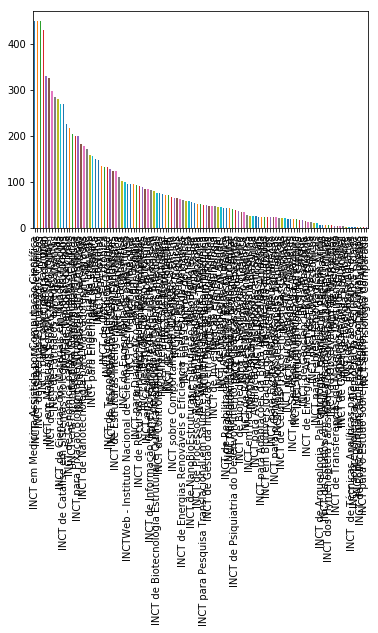

In [110]:
result.inct.value_counts().plot.bar()

In [111]:
len(result.id_lattes.unique())

2099

In [112]:
len(result)

10310

In [123]:
result.id_lattes.value_counts()

3252717320434089    135
9545152910170494     83
1061566045001511     78
6507131548554325     72
6191239140886028     67
569614713880200      64
1325247019367288     64
2828124381670231     63
7506578377321090     55
3919711591553904     52
5320044076881770     52
7748064810111389     51
6858139747014559     50
9500245604678806     47
9848311210578810     44
7508554632929520     43
7090419604571199     43
291695624884565      42
2365059843175411     40
7992694643607149     40
240551533292579      38
7313722167100200     36
7925449690046513     35
4947860249518663     34
8518698825437370     33
1043780332502091     33
9522788035526763     33
4542759243110371     33
3150074537946167     33
3163271519013006     32
                   ... 
8049184468038869      1
8796898263583929      1
2178533944807519      1
5472101509640211      1
5590258147022413      1
232075212409214       1
7014991384513854      1
1741899845739117      1
1029892667445223      1
9578804482562433      1
7304216246785522

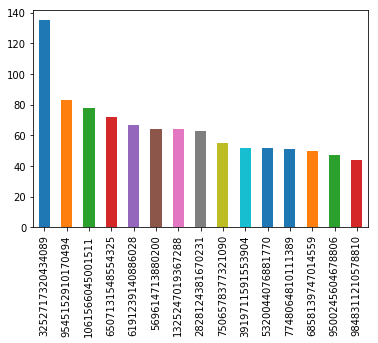

In [113]:
result.id_lattes.value_counts()[:15].plot.bar()

In [125]:
a = result.loc[result.id_lattes==1061566045001511]
a.tipo.unique()

array(['Patente', 'Software'], dtype=object)